In [2]:
# Imporing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# loading dataset
df = pd.read_csv("olympics2024.csv")
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [4]:
# shape
df.shape

(91, 7)

In [5]:
# inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [6]:
# statistics 
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [7]:
# cheking null data
df.isnull().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [8]:
# duplicate data
df.duplicated().sum()

0

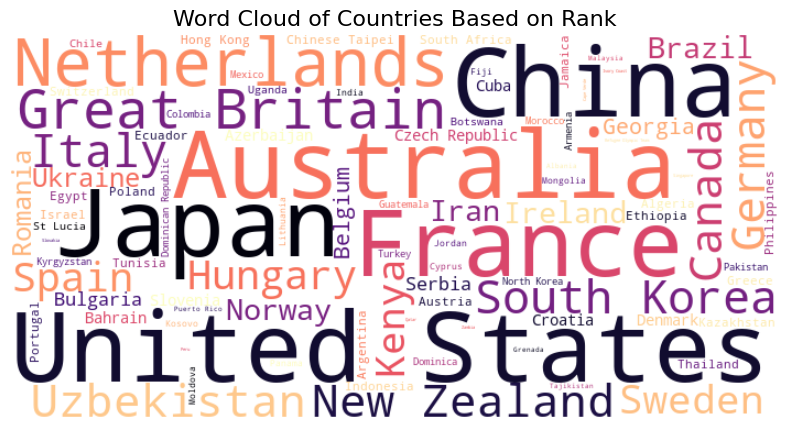

In [9]:
# Plotting Cloud for All Countries
df['Frequency'] = df['Rank'].max() - df['Rank'] + 1

country_freq = dict(zip(df['Country'], df['Frequency']))
wordcloud = WordCloud(max_words=91, width=700, height=350, background_color='white', colormap='magma',
              contour_color='black', contour_width=4, collocations=False, random_state=42).generate_from_frequencies(country_freq)

plt.figure(figsize=(25, 5))
plt.imshow(wordcloud, interpolation='bilinear', )
plt.axis('off')
plt.title('Word Cloud of Countries Based on Rank', fontsize=16)
plt.show()

# UNIVARIATE ANALYSIS

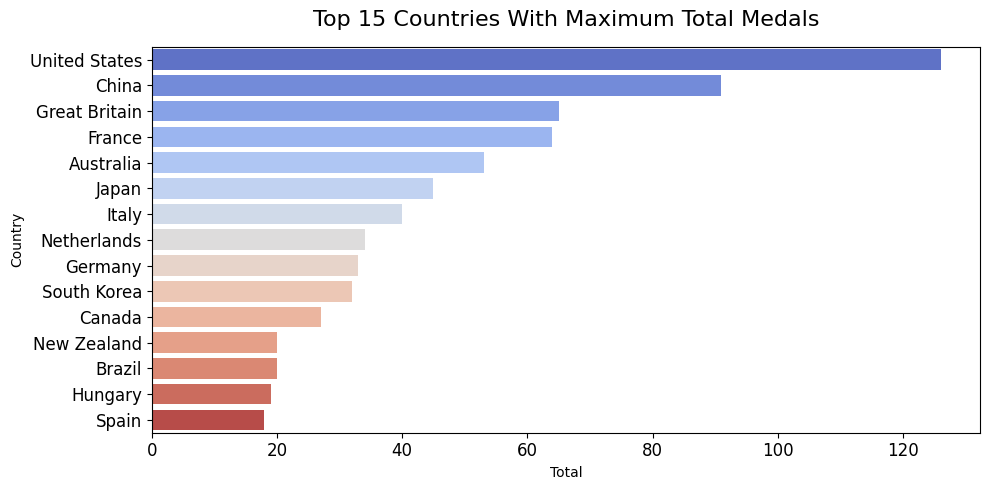

In [12]:
# Countries With Maximum Total Medals
plt.figure(figsize=(10, 5))
sns.barplot(data=df.nlargest(15, 'Total'), y='Country', x='Total', palette='coolwarm',hue='Country')
plt.title('Top 15 Countries With Maximum Total Medals', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

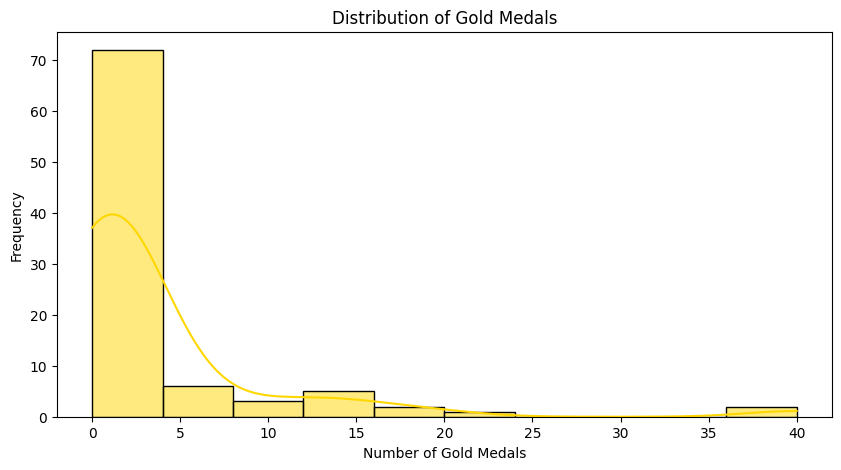

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Gold'], bins=10, kde=True, color='gold')
plt.title('Distribution of Gold Medals')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Frequency')
plt.show()


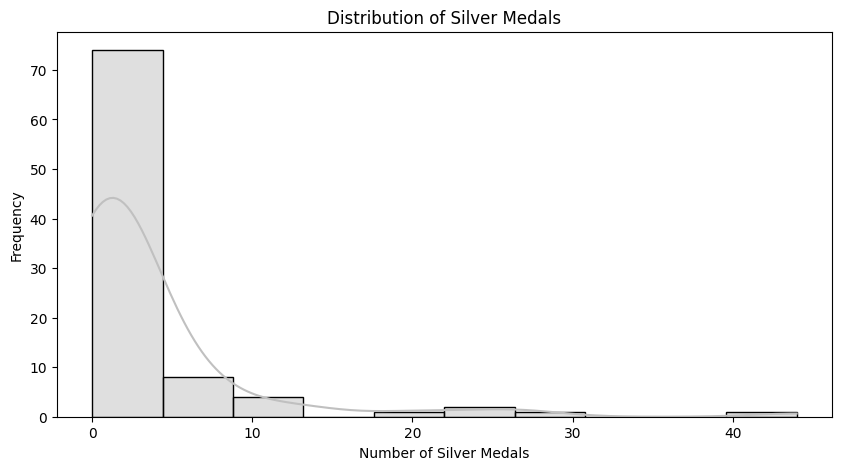

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Silver'], bins=10, kde=True, color='silver')
plt.title('Distribution of Silver Medals')
plt.xlabel('Number of Silver Medals')
plt.ylabel('Frequency')
plt.show()

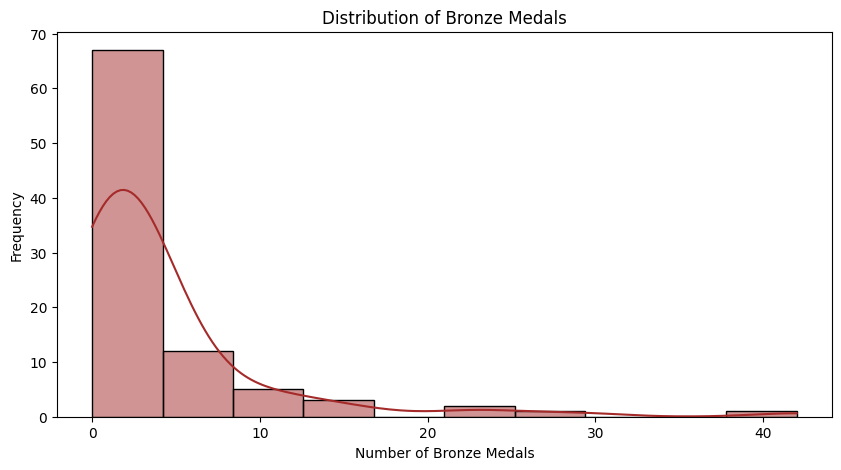

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Bronze'], bins=10, kde=True, color='brown')
plt.title('Distribution of Bronze Medals')
plt.xlabel('Number of Bronze Medals')
plt.ylabel('Frequency')
plt.show()

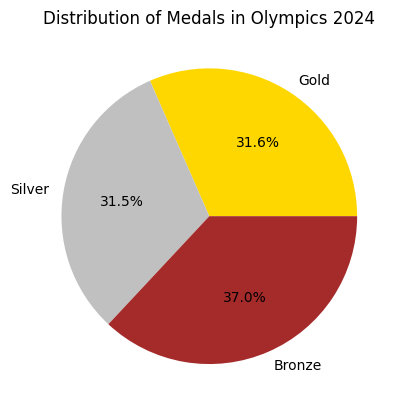

In [14]:
medal_counts = [df['Gold'].sum(),df['Silver'].sum(),df['Bronze'].sum()]
medal_labels = ['Gold','Silver','Bronze']
colors = ['gold', 'silver', 'brown']  # Gold, Silver, and a dark orange for bronze

plt.pie(medal_counts,labels=medal_labels,autopct='%1.1f%%',colors=colors)
plt.title('Distribution of Medals in Olympics 2024')
plt.show()


# BIVARIATE ANALYSIS

In [46]:
correlation = df['Gold'].corr(df['Silver'])
print(f'Correlation between Gold and Silver: {correlation}')


Correlation between Gold and Silver: 0.9109495806020739


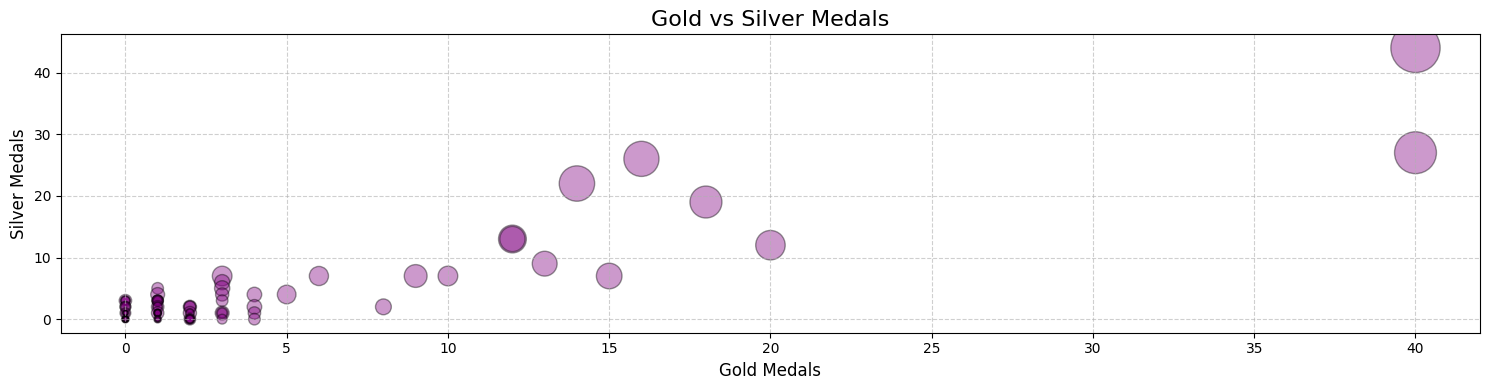

In [40]:
# Gold vs Silver Medals
plt.figure(figsize=(15, 4))
plt.scatter(df['Gold'], df['Silver'], s=df['Total']*10, alpha=0.4, color='purple', edgecolors='black')
plt.title('Gold vs Silver Medals', fontsize=16)
plt.xlabel('Gold Medals', fontsize=12)
plt.ylabel('Silver Medals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [48]:
crosstab = pd.crosstab(df['Country'], df['Total'])
print(crosstab)


Total          1    2    3    4    5    6    7    8    9    10   ...  32   \
Country                                                          ...        
Albania          0    1    0    0    0    0    0    0    0    0  ...    0   
Algeria          0    0    1    0    0    0    0    0    0    0  ...    0   
Argentina        0    0    1    0    0    0    0    0    0    0  ...    0   
Armenia          0    0    0    1    0    0    0    0    0    0  ...    0   
Australia        0    0    0    0    0    0    0    0    0    0  ...    0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Uganda           0    1    0    0    0    0    0    0    0    0  ...    0   
Ukraine          0    0    0    0    0    0    0    0    0    0  ...    0   
United States    0    0    0    0    0    0    0    0    0    0  ...    0   
Uzbekistan       0    0    0    0    0    0    0    0    0    0  ...    0   
Zambia           1    0    0    0    0    0    0    0    0    0  ...    0   

# MULTIVARIATE ANALYSIS

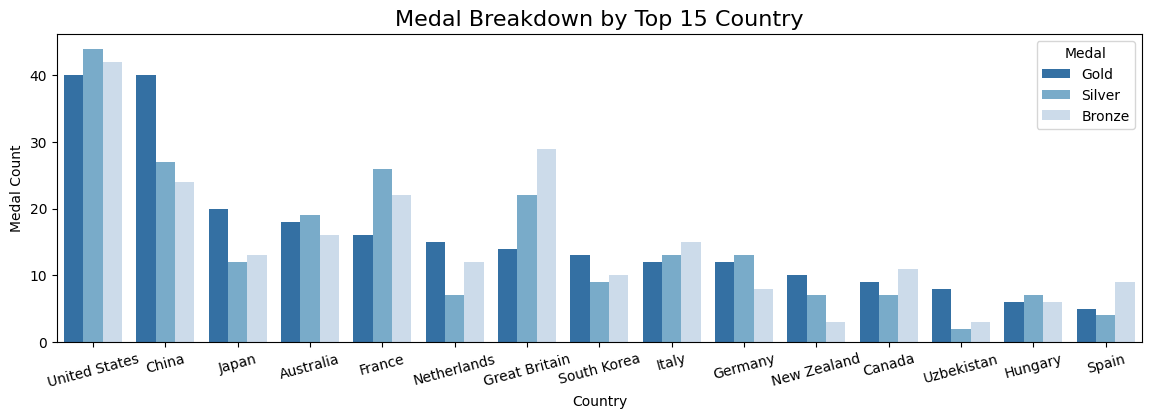

In [42]:
# Medal Breakdown by Country
df_top10 = df.head(15).set_index('Country')
df_melted = df_top10[['Gold', 'Silver', 'Bronze']].reset_index().melt(id_vars='Country', var_name='Medal', value_name='Count')

plt.figure(figsize=(14,4))
sns.barplot(x='Country', y='Count', hue='Medal', data=df_melted, palette='Blues_r')
plt.title('Medal Breakdown by Top 15 Country', size=16)
plt.ylabel('Medal Count')
plt.xticks(rotation=15)
plt.legend(title='Medal')
plt.show()

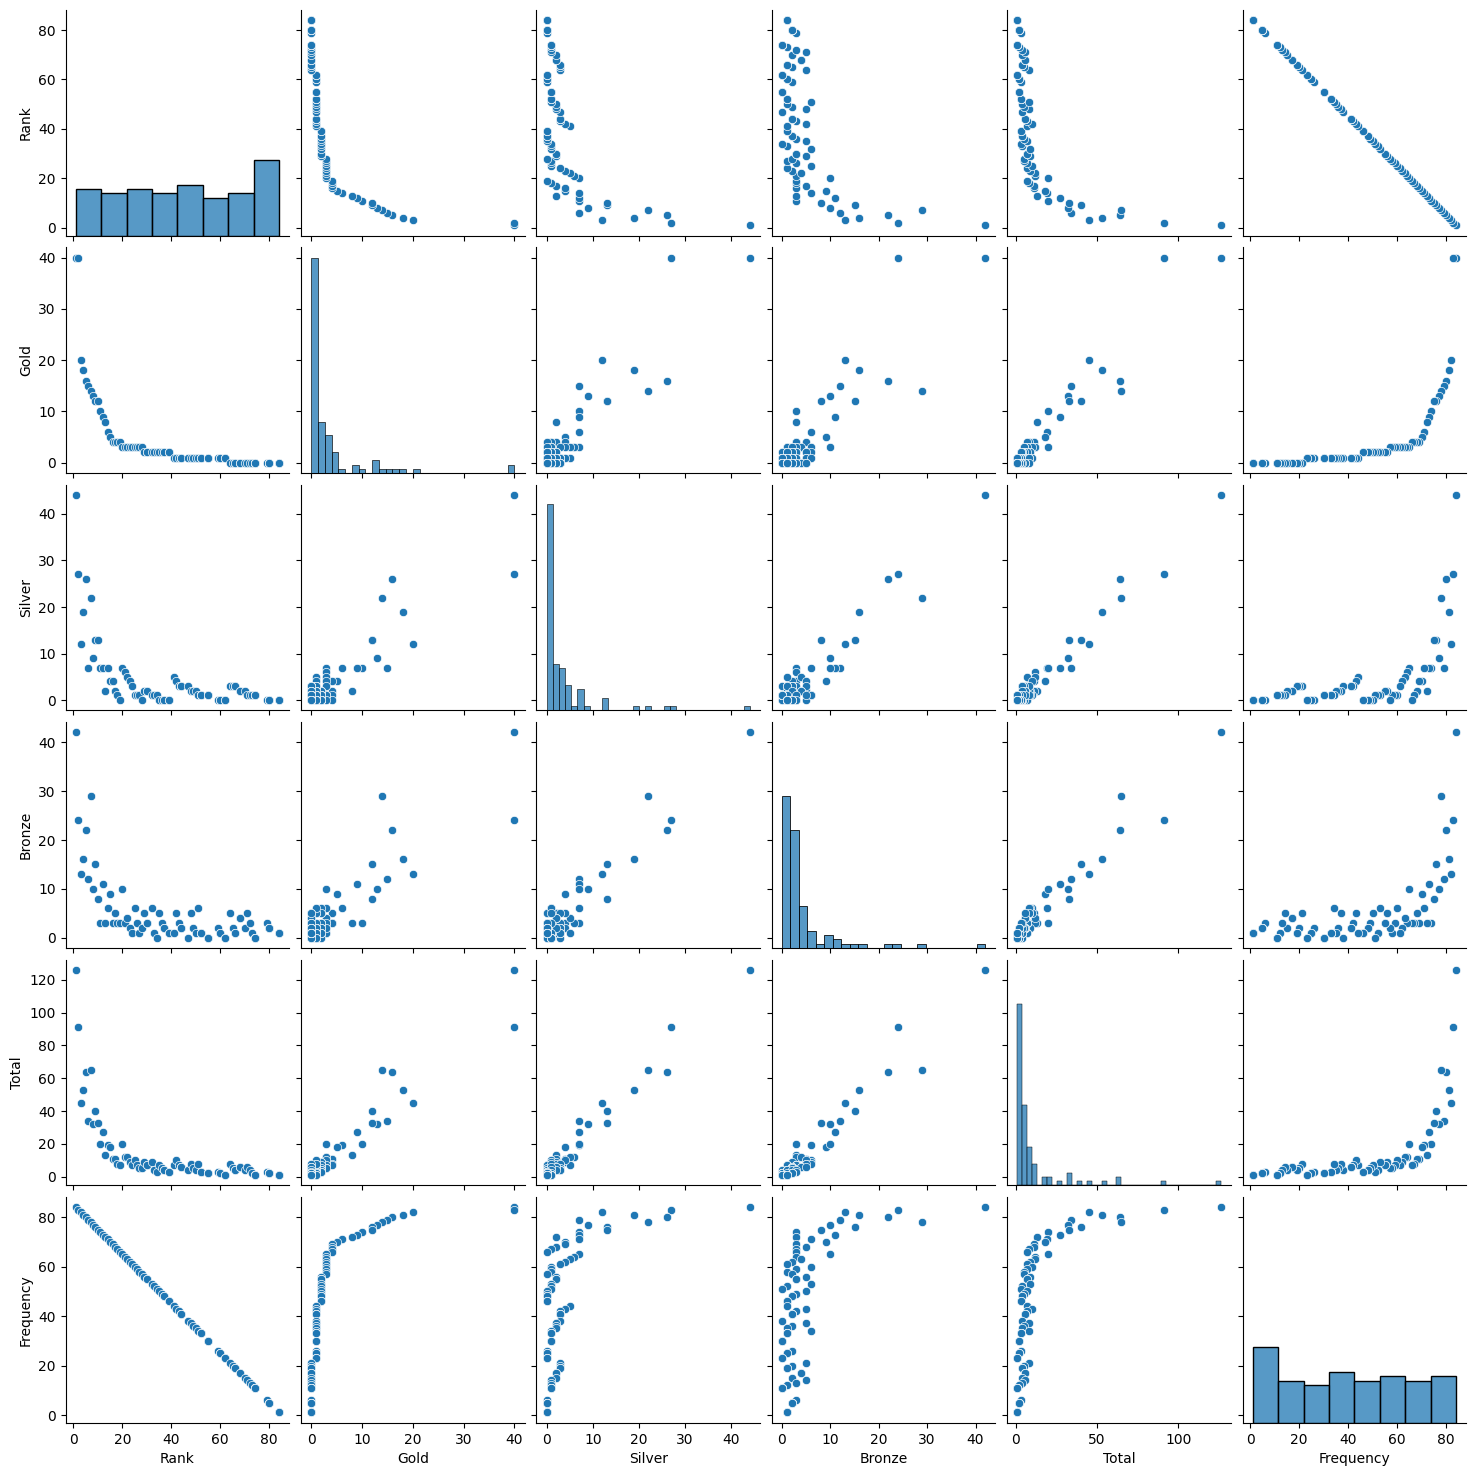

In [15]:
sns.pairplot(df)


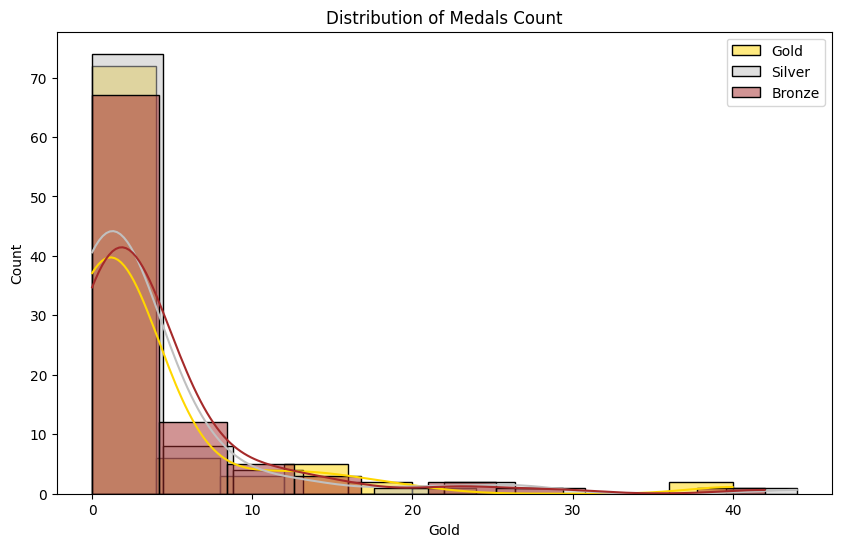

In [20]:
# Distribution of Gold, Silver, and Bronze medals
plt.figure(figsize=(10,6))
sns.histplot(df['Gold'], bins=10, kde=True, color='gold', label='Gold')
sns.histplot(df['Silver'], bins=10, kde=True, color='silver', label='Silver')
sns.histplot(df['Bronze'], bins=10, kde=True, color='brown', label='Bronze')
plt.title('Distribution of Medals Count')
plt.legend()
plt.show()


<Figure size 1000x700 with 0 Axes>

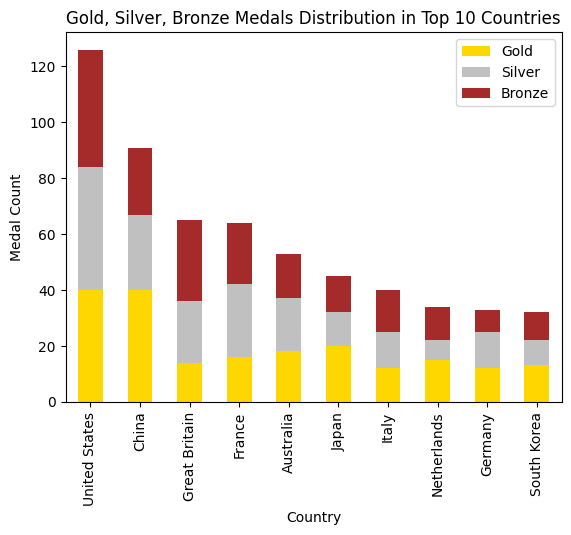

In [22]:
# Stacked bar chart of medal proportions for top countries
df['Total Medals'] = df['Gold'] + df['Silver'] + df['Bronze']

top_10 = df.nlargest(10, 'Total Medals')

plt.figure(figsize=(10, 7))
top_10.set_index('Country')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=['gold', 'silver', 'brown'])
plt.title('Gold, Silver, Bronze Medals Distribution in Top 10 Countries')
plt.ylabel('Medal Count')
plt.show()


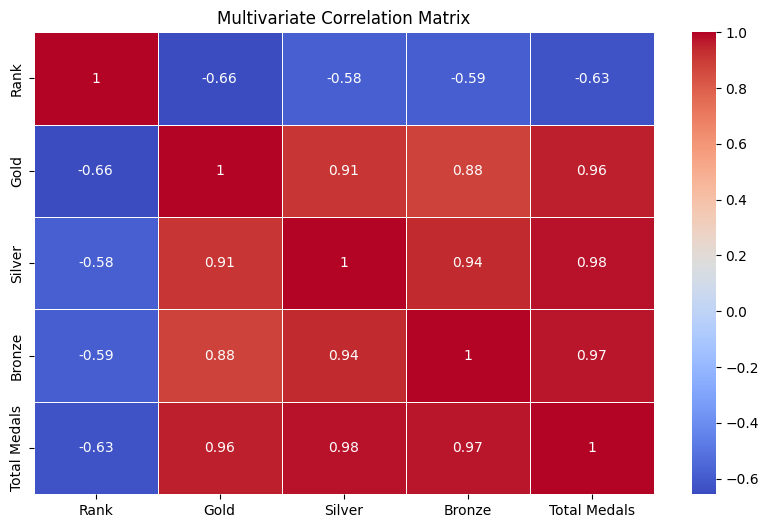

In [30]:
# Heatmap for more detailed multivariate relations
plt.figure(figsize=(10,6))
sns.heatmap(df[['Rank', 'Gold', 'Silver', 'Bronze', 'Total Medals']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multivariate Correlation Matrix')
plt.show()


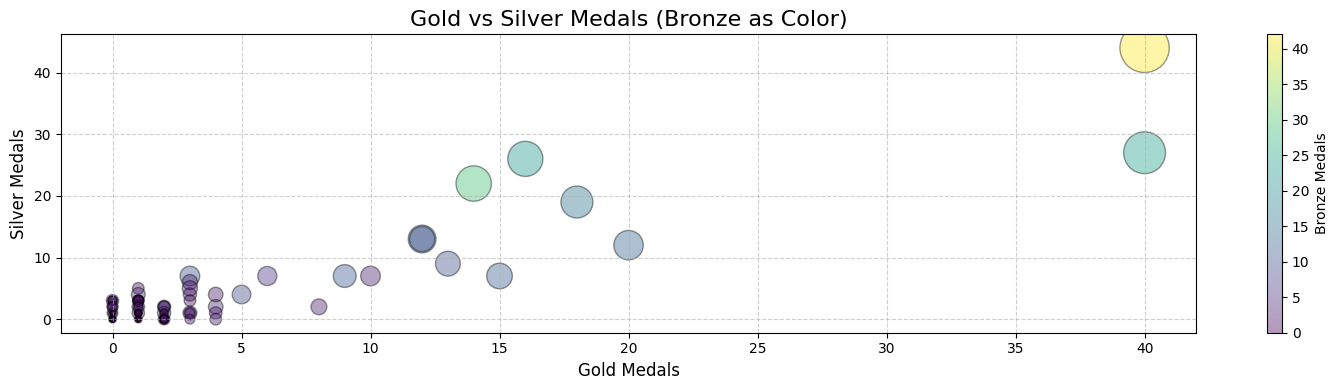

In [34]:
plt.figure(figsize=(15, 4))
plt.scatter(df['Gold'], df['Silver'], s=df['Total']*10, alpha=0.4, c=df['Bronze'], cmap='viridis', edgecolors='black')
plt.title('Gold vs Silver Medals (Bronze as Color)', fontsize=16)
plt.xlabel('Gold Medals', fontsize=12)
plt.ylabel('Silver Medals', fontsize=12)
plt.colorbar(label='Bronze Medals')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

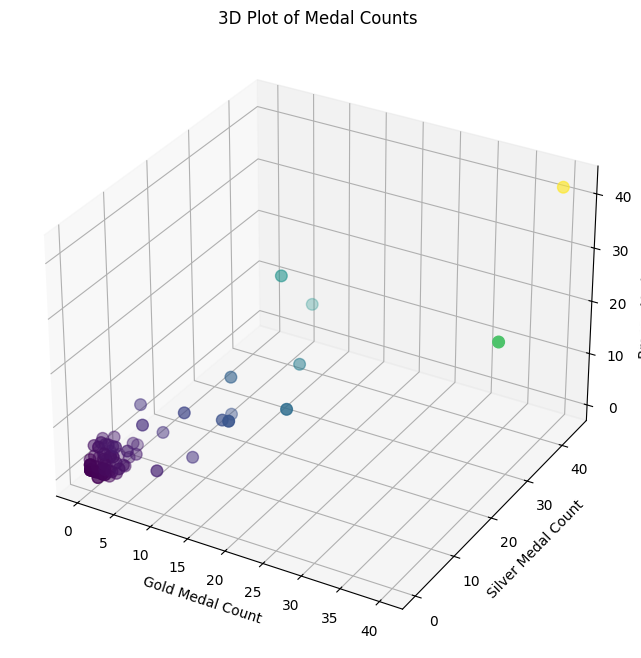

In [39]:
#visualize in 3D (requires plotly or mpl_toolkits)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(df['Gold'], df['Silver'], df['Bronze'], c=df['Total'], cmap='viridis', s=70)

ax.set_xlabel('Gold Medal Count')
ax.set_ylabel('Silver Medal Count')
ax.set_zlabel('Bronze Medal Count')
plt.title('3D Plot of Medal Counts')
plt.show()
